In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

#----------------------------------------------------------------------------


from sklearn.metrics  import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression  

#------------------------------------------------------------------------------
from sklearn  import preprocessing 

from sklearn.metrics  import r2_score

















In [2]:
data = pd.read_csv('loan_data.csv')


# Cleaning Data

In [3]:
data.replace(' ', np.nan, inplace=True)

data.dropna(inplace = True)                      # Remove rows with NaN  / $0 


In [78]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [6]:
New_data = data.drop(['Loan_ID'] , axis = 1)

In [7]:
x =  New_data[['ApplicantIncome', 'CoapplicantIncome' , 'Loan_Amount_Term']]
y = New_data[['LoanAmount']]

In [32]:
##x.columns = data[['ApplicantIncome	', 'Cost', 'Gross revenue' ]]
#y.columns = [ 'Net revenue' ]
#New_data.columns  = ['Rank', 'Cost', 'Gross revenue' , 'Net revenue' ] 


In [10]:
y

,LoanAmount
0,128.0
1,66.0
2,120.0
3,141.0
4,95.0
...,...
376,128.0
377,108.0
378,71.0
379,40.0


In [66]:
New_data = New_data.apply(pd.to_numeric, errors='ignore')


# Testing & Regression 

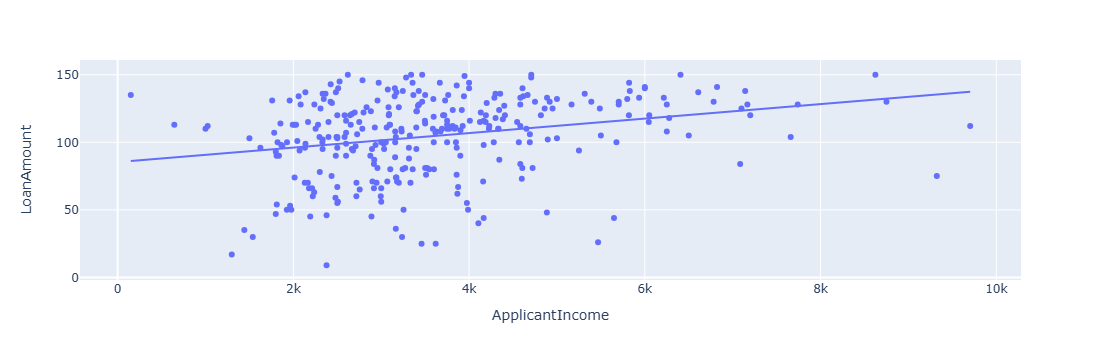

In [55]:
figure = px.scatter(data_frame = New_data, x="ApplicantIncome", y="LoanAmount", size=None, color= None, trendline="ols")
figure.show()

In [38]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [151]:
x

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term
0,4583,1508.0,360.0
1,3000,0.0,360.0
2,2583,2358.0,360.0
3,6000,0.0,360.0
4,2333,1516.0,360.0
...,...,...,...
376,5703,0.0,360.0
377,3232,1950.0,360.0
378,2900,0.0,360.0
379,4106,0.0,180.0


In [150]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
Mod0 = regr.fit(x, y)
print(Mod0.intercept_)
print(Mod0.coef_)
print(Mod0.score(x,y))

[52.51852]
[[0.00672071 0.0023921  0.07285863]]
0.13762689711940013


In [45]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
L = regr.fit(xtrain, ytrain)

In [41]:
print(L.intercept_)
print(L.coef_)
print(L.score(x,y))

[50.36979015]
[[0.00651376 0.00491735 0.07731262]]
0.08538435709297965


# New Testing (Adding Variables)


In [83]:
New_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


## Cleaning & Transforming  New Data (Binary)

In [103]:
New_data_int = New_data.replace({'Married': {'Yes': 1, 'No': 0} , 
                               'Gender':{'Male': 1, 'Female': 0},
                                'Education':{'Graduate': 1, 'Not Graduate': 0}})

In [104]:
New_data_int

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,1,1,0,0,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3+,1,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,1,1,0,1,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,0,0,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,1,1,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [107]:
x2 =  New_data_int[['ApplicantIncome', 'CoapplicantIncome' , 'Loan_Amount_Term' , 'Gender' , 'Married' ,'Education' ]]
y2 = New_data_int[['LoanAmount']]

In [108]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, 
                                                test_size=0.2, 
                                                random_state=42)

# Regression Model "All data "

In [142]:
regr = LinearRegression()
Mod1 = regr.fit(x2, y2)
print(Mod1.intercept_)
print(Mod1.coef_)
print(Mod1.score(x2,y2))

[37.90855187]
[[ 6.88614346e-03  2.23851240e-03  8.80353675e-02  2.41382768e+00
   1.20078950e+01 -1.34176298e-01]]
0.18203734698664675


In [145]:
y_pred  = Mod1.predict(x2)
y_pred

array([[118.82370272],
       [104.54726093],
       [107.08832765],
       [113.1977963 ],
       [103.48196434],
       [107.4914483 ],
       [ 90.9983346 ],
       [ 74.13646717],
       [105.96734567],
       [ 93.63747141],
       [117.67558993],
       [136.77086574],
       [106.20477704],
       [108.20651453],
       [115.451902  ],
       [ 81.94493072],
       [ 93.68935189],
       [104.19072066],
       [111.72193283],
       [109.99248053],
       [101.55821622],
       [ 96.671052  ],
       [ 86.99130932],
       [116.25628689],
       [122.78865495],
       [123.97307162],
       [107.38933498],
       [102.10429742],
       [ 98.56577815],
       [ 90.71774658],
       [ 98.5954947 ],
       [115.67526876],
       [105.14885101],
       [102.13156164],
       [111.99231672],
       [113.5396974 ],
       [109.60158228],
       [104.74695909],
       [ 98.15478152],
       [ 83.25001172],
       [106.50401515],
       [ 99.07752474],
       [101.13173659],
       [ 90

In [146]:
r2_score(y2 , y_pred)

0.18203734698664675

# Regression Model " With train and test "

In [110]:
regr = LinearRegression()
L2 = regr.fit(xtrain2, ytrain2)
print(L2.intercept_)
print(L2.coef_)
print(L2.score(x2,y2))

[45.47108128]
[[ 6.57380126e-03  4.60822929e-03  8.56850737e-02 -3.87319133e+00
   1.03653277e+01 -1.27141545e+00]]
0.13015681236178955


In [136]:
y_pred_train = L2.predict(xtrain2)

In [137]:
y_pred

array([[119.25929942],
       [ 90.81931166],
       [109.74757905],
       [ 93.80175744],
       [ 93.20180699],
       [ 92.56425035],
       [ 94.90940093],
       [106.34814637],
       [103.33057993],
       [ 96.44172598],
       [106.09435574],
       [102.85347172],
       [ 88.59572545],
       [120.12023394],
       [ 94.91761061],
       [115.10424721],
       [107.17625367],
       [108.11502183],
       [109.15975596],
       [ 86.37824277],
       [ 85.78422456],
       [110.95282916],
       [104.74994439],
       [113.90280925],
       [ 89.04069287],
       [110.47681164],
       [ 90.46720775],
       [ 87.18030712],
       [116.24115584],
       [106.00208946],
       [ 99.85400264],
       [103.65217523],
       [115.40992627],
       [108.64768293],
       [ 81.92393791],
       [114.93601097],
       [ 94.95054021],
       [ 99.79543174],
       [111.42230071],
       [103.35185823],
       [ 98.5595571 ],
       [101.45047277],
       [ 91.99232964],
       [ 99

In [139]:
r2_score(ytrain , y_pred_train)

0.19691259889975554

In [148]:
y_pred_test = L2.predict(xtest2)

# Plotting Data

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

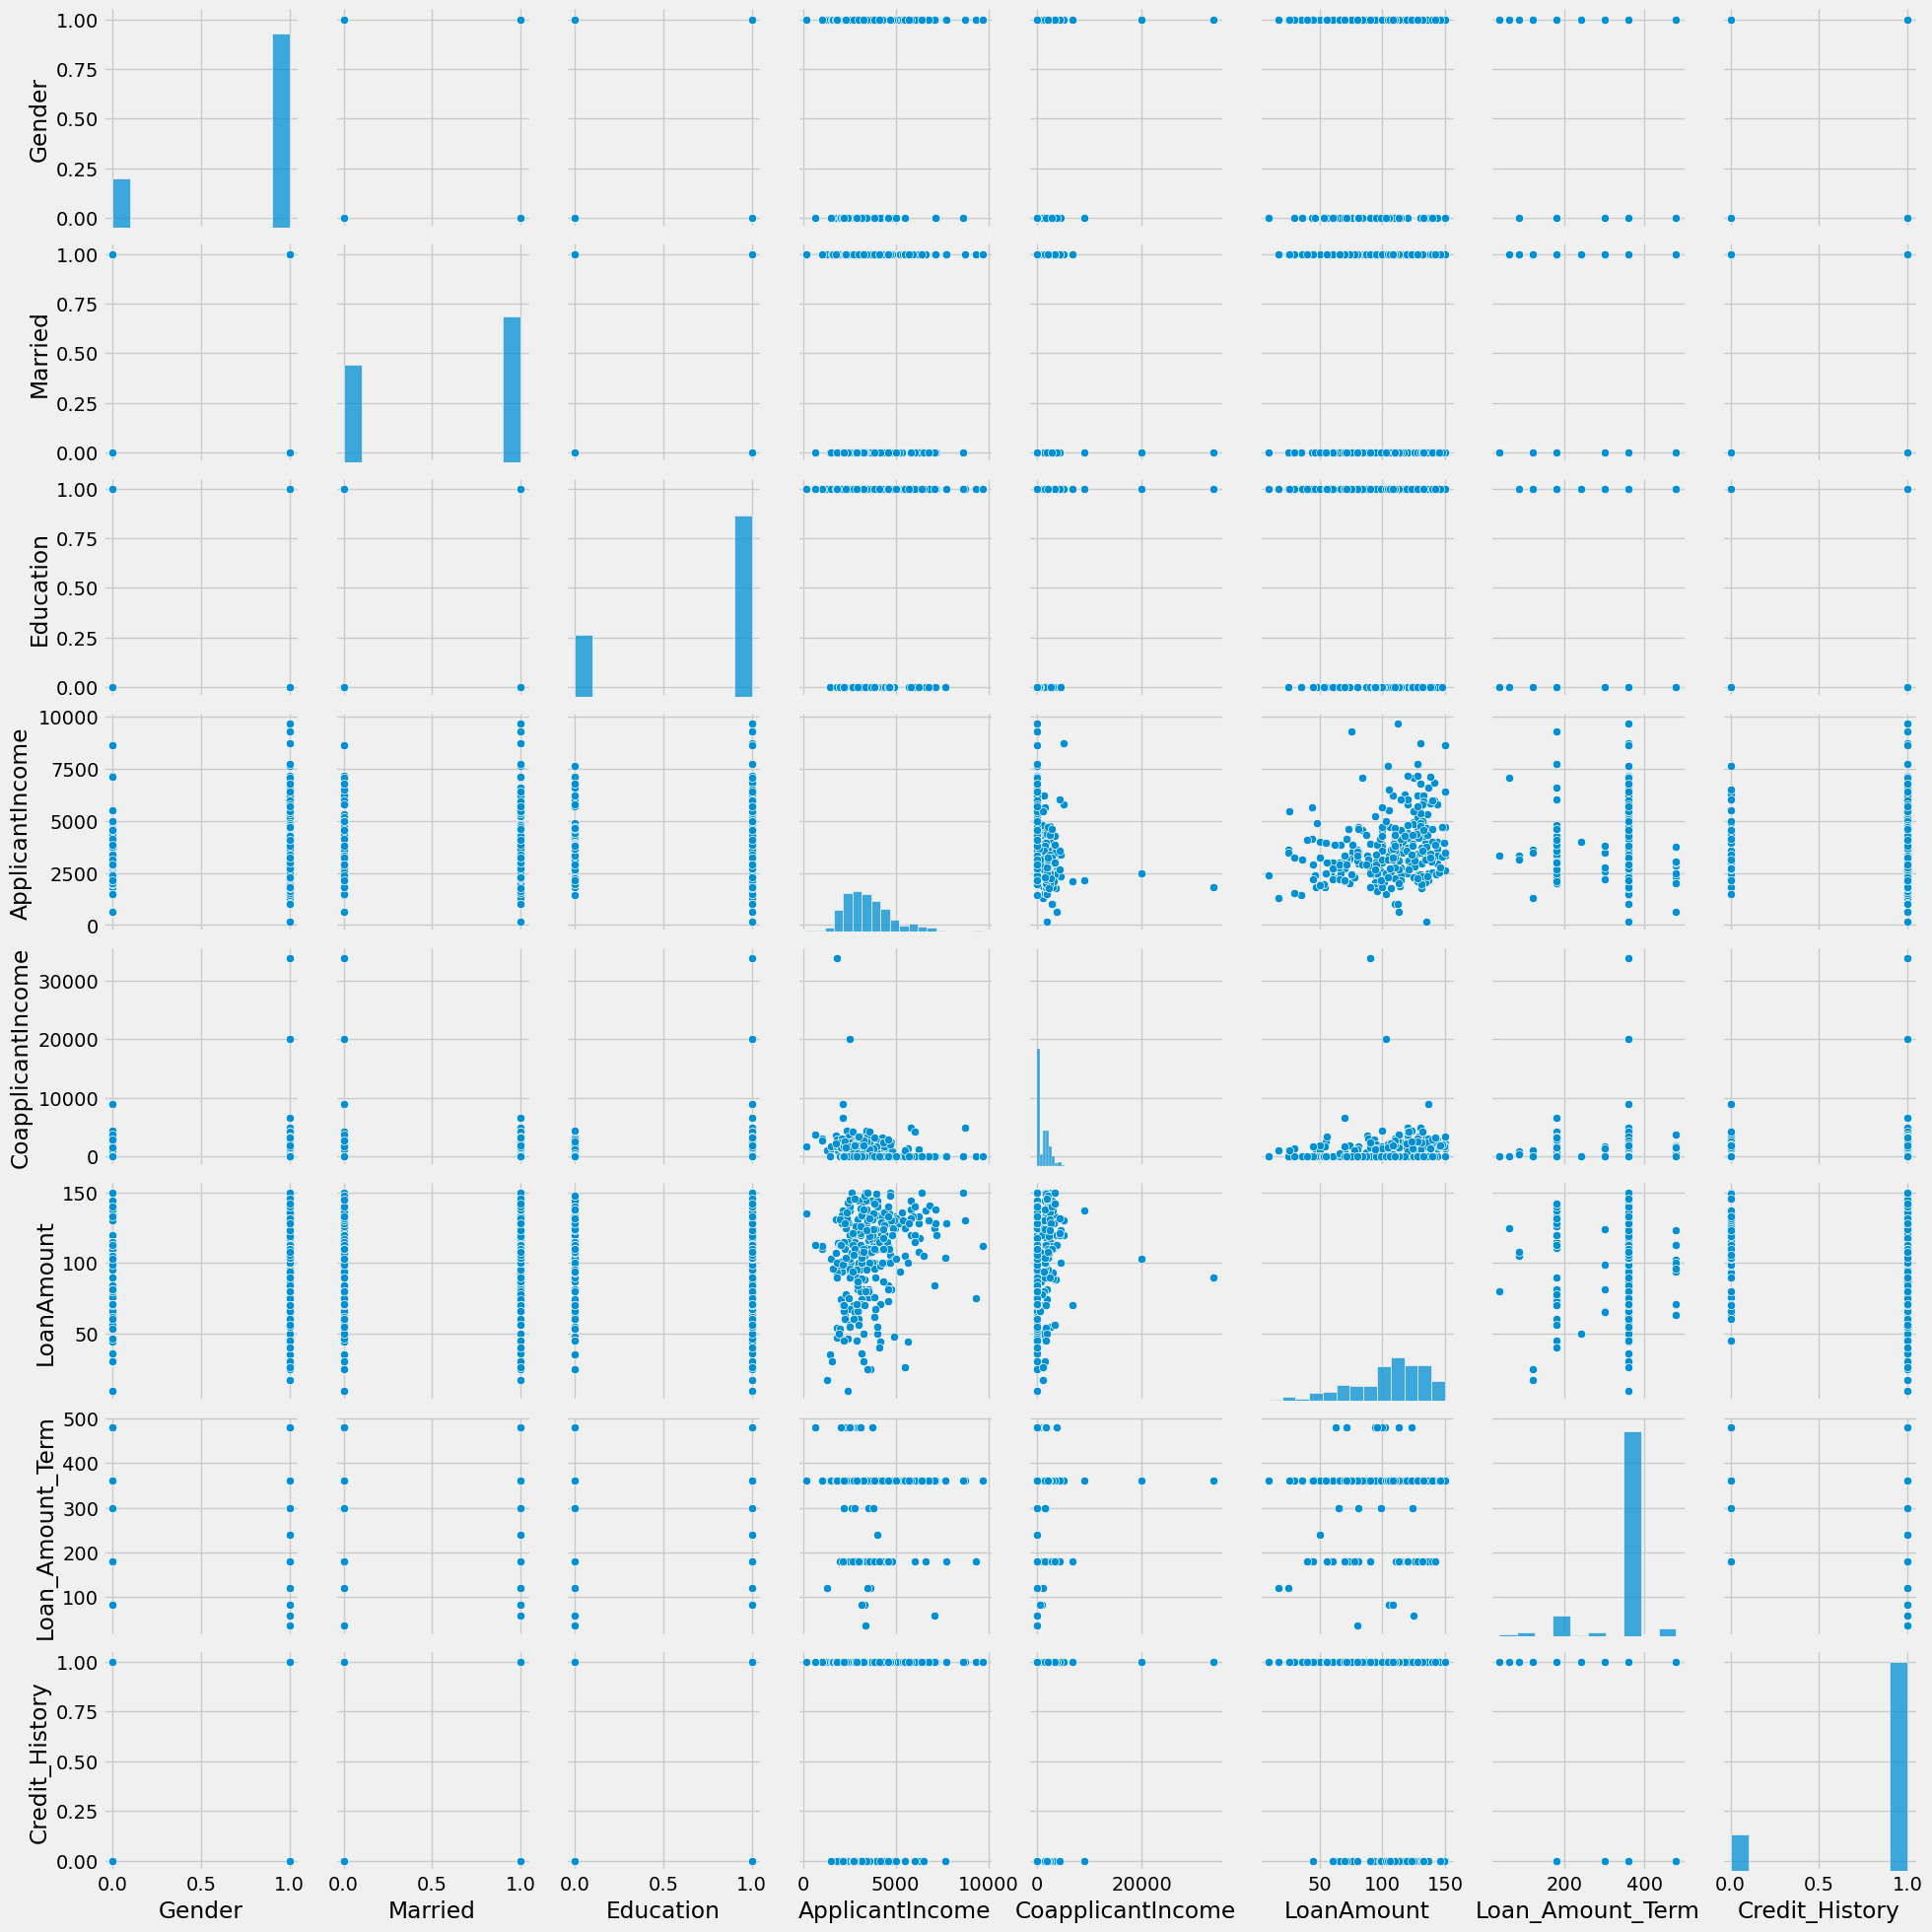

In [128]:
sns.pairplot(New_data_int )
plt.show()
#plt.plot(y,pred  , color = 'red' )

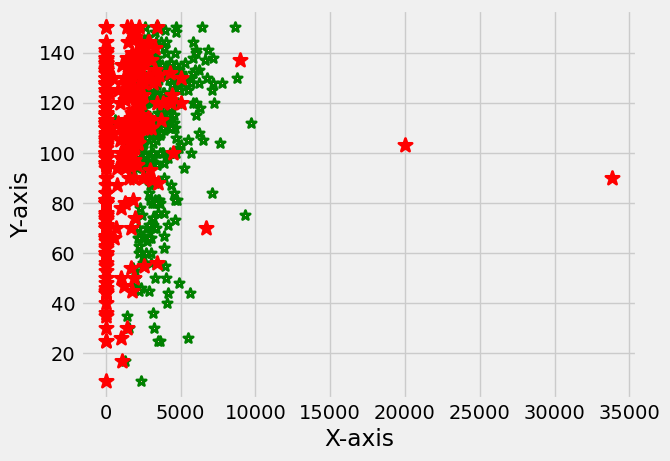

In [132]:
plt.scatter(x= 'ApplicantIncome', y = "LoanAmount" , data = New_data , c ="pink", 
            linewidths = 2, 
            marker ="*", 
            edgecolor ="green", 
            s = 50)
 
plt.scatter(x= 'CoapplicantIncome', y = "LoanAmount" , data = New_data ,  c ="red",
            linewidths = 2,
            marker ="*", 
            edgecolor ="red", 
            s = 100)
 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:
plt.scatter( x= 'ApplicantIncome', y = "LoanAmount" , data = New_data , s= 100  ,alpha = 0.5 )          ## plot ##

plt.title('    ' , fontsize = 20 )
plt.xlabel('  '  ,  fontsize = 14)
plt.ylabel('   '  , fontsize = 14)


plt.style.use('fivethirtyeight')

#plt.plot(y,pred  , color = 'red' )

In [135]:
x

0.19691259889975554

# Start new analysis :

In [49]:
data.duplicated().sum()
#data.duplicated()

0

In [50]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



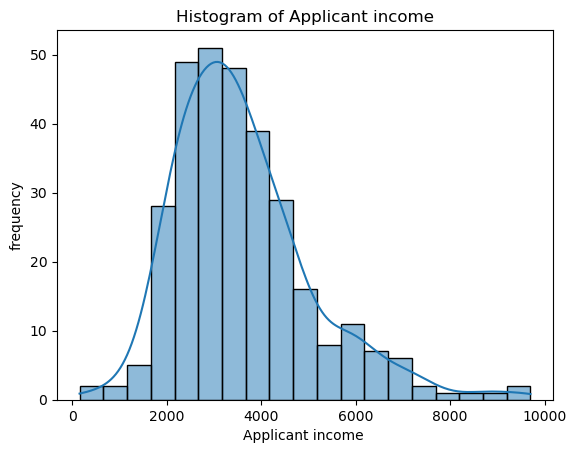

In [51]:
sns.histplot(data['ApplicantIncome'] , kde = True )
plt.title('Histogram of Applicant income')
plt.xlabel('Applicant income ')
plt.ylabel('frequency')
plt.show()

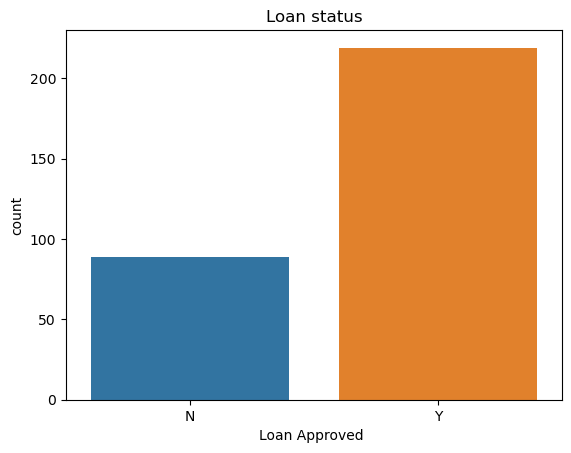

In [52]:
sns.countplot(x = 'Loan_Status'  , data = data)
plt.title('Loan status')
plt.xlabel('Loan Approved ')
plt.ylabel('count')
plt.show()

In [189]:
data.groupby('Education')['LoanAmount'].mean().reset_index()

,Education,LoanAmount
0,Graduate,107.215190
1,Not Graduate,107.428571


In [34]:
avg_loan_amount_by_education = data.groupby('Education')['LoanAmount'].mean().reset_index()

Text(0, 0.5, 'count')

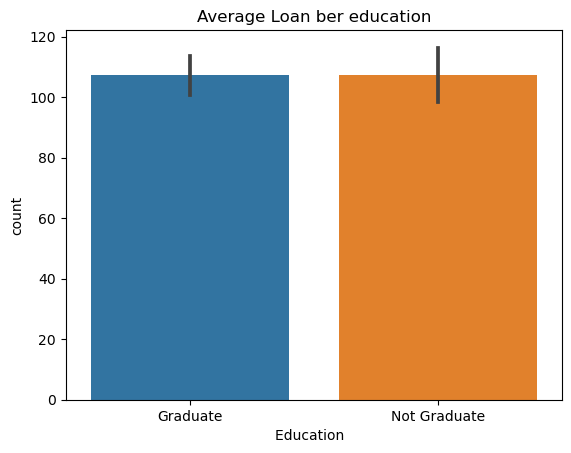

In [187]:
sns.barplot(x= 'Education'  , y = 'LoanAmount' , data = data)
plt.title('Average Loan ber education')
plt.xlabel('Education  ')
plt.ylabel('count')

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

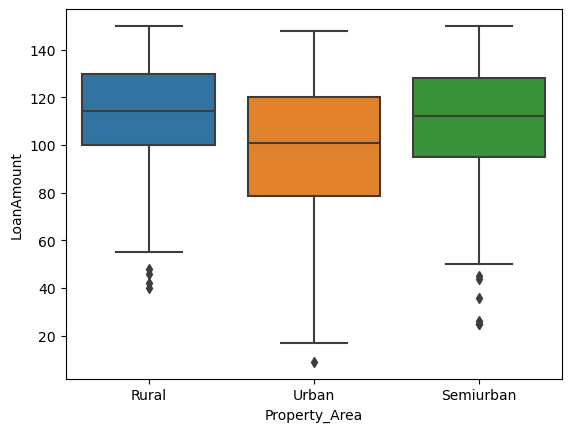

In [38]:
sns.boxplot(x= 'Property_Area'  , y= 'LoanAmount'  , data = data)
plt.title('Loan amount distribution')
plt.xlabel('Proberty  ')
plt.ylabel('Loan amount')

Text(0, 0.5, 'count')

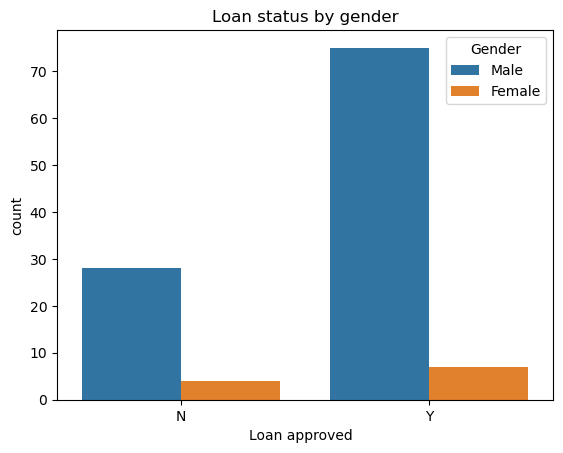

In [304]:
sns.countplot(x= 'Loan_Status'  , hue = 'Gender'  , data = data)
plt.title('Loan status by gender')
plt.xlabel('Loan approved  ')
plt.ylabel('count')

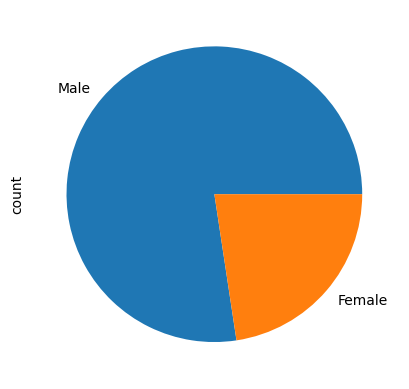

In [49]:
avg_status_by_gender = data['Gender'].value_counts().plot(kind='pie')

In [52]:
Loan_status_by_married = data.groupby('Married')['Loan_Status'].value_counts().unstack()

In [53]:
Loan_status_by_married

Loan_Status,N,Y
Married,,
No,52,101
Yes,58,170


Text(0.5, 1.0, 'Loan status by marital status')

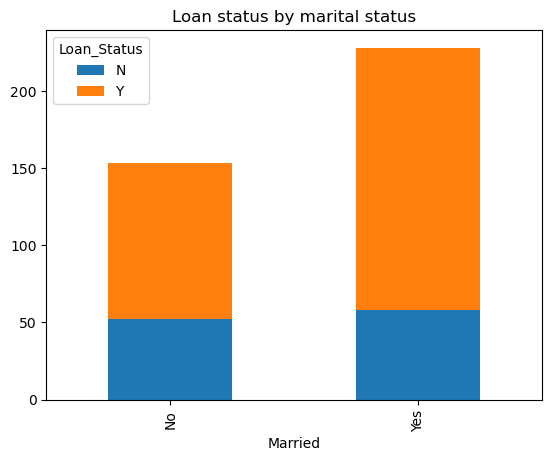

In [55]:
Loan_status_by_married.plot(kind = 'bar' , stacked=True)
plt.title('Loan status by marital status')

Text(0, 0.5, 'loan amount')

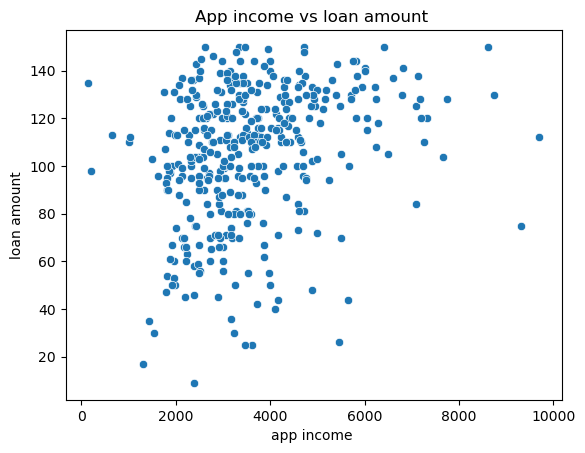

In [58]:
sns.scatterplot(x= 'ApplicantIncome', y = "LoanAmount" , data = data)
plt.title('App income vs loan amount ')
plt.xlabel('app income ')
plt.ylabel('loan amount')

In [64]:
numeric_data  = data.select_dtypes(include = ['int' , 'float'])

In [65]:
numeric_data 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [67]:
corr_matrix  = numeric_data.corr()

In [68]:
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000


<Axes: >

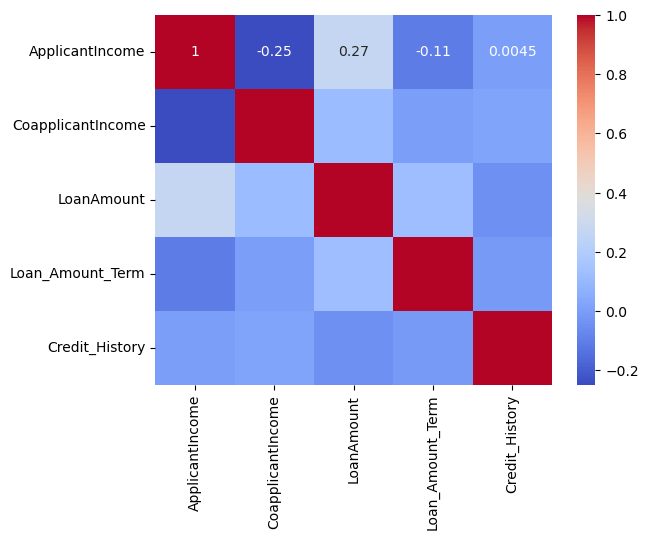

In [70]:
sns.heatmap(corr_matrix , annot = True , cmap = 'coolwarm')

In [71]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [191]:
avg_loan_term_by_employee = data.groupby('Self_Employed')['Loan_Amount_Term'].mean().reset_index()

In [192]:
avg_loan_term_by_employee 

,Self_Employed,Loan_Amount_Term
0,No,329.280000
1,Yes,334.285714


<Axes: xlabel='Self_Employed', ylabel='Loan_Amount_Term'>

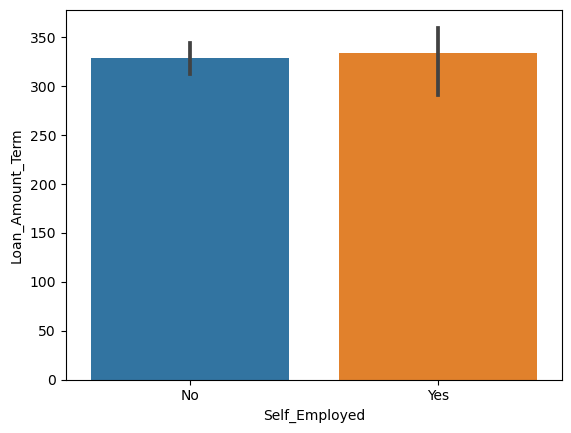

In [193]:
sns.barplot(x = 'Self_Employed'  , y= 'Loan_Amount_Term' , data = data )

In [194]:
x = data[['Married','ApplicantIncome' ,'Education','LoanAmount' , 'Credit_History']]
y = data[['Loan_Status']]
 

In [195]:
x.fillna(0)
y.fillna(0)


,Loan_Status
0,N
5,Y
8,Y
18,Y
22,N
...,...
363,Y
367,N
371,N
376,Y


In [196]:
from sklearn  import preprocessing 
labelencoder  =  preprocessing.LabelEncoder()

In [197]:
y['Loan_Status'] = labelencoder.fit_transform(y['Loan_Status'])

C:\Users\muham\AppData\Local\Temp\ipykernel_47780\3706250552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Loan_Status'] = labelencoder.fit_transform(y['Loan_Status'])


In [198]:
y  # y= 1  x=0

,Loan_Status
0,0
5,1
8,1
18,1
22,0
...,...
363,1
367,0
371,0
376,1


In [199]:
data['Loan_Status']

0      N
5      Y
8      Y
18     Y
22     N
      ..
363    Y
367    N
371    N
376    Y
379    Y
Name: Loan_Status, Length: 114, dtype: object

In [200]:
labelencoder.classes_

array(['N', 'Y'], dtype=object)

In [201]:
x['Married'] = labelencoder.fit_transform(x['Married'])

C:\Users\muham\AppData\Local\Temp\ipykernel_47780\1205279489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Married'] = labelencoder.fit_transform(x['Married'])


In [202]:
x['Education'] = labelencoder.fit_transform(x['Education'])

C:\Users\muham\AppData\Local\Temp\ipykernel_47780\4163739310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Education'] = labelencoder.fit_transform(x['Education'])


In [203]:
x

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,0,128.0,1.0
5,1,3200,0,70.0,1.0
8,1,1299,0,17.0,1.0
18,1,4226,1,110.0,1.0
22,0,4692,0,106.0,1.0
...,...,...,...,...,...
363,1,1782,0,107.0,1.0
367,1,2787,0,146.0,0.0
371,1,2726,0,106.0,0.0
376,1,5703,0,128.0,1.0


# preprocessing StandarScaler

In [204]:
from sklearn.preprocessing  import  StandardScaler
scaler = StandardScaler()

In [205]:
x = scaler.fit_transform(x)

In [206]:
x

array([[ 0.40406102,  0.53407751, -0.66561098,  0.72930225,  0.38924947],
       [ 0.40406102, -0.37722811, -0.66561098, -1.31225002,  0.38924947],
       [ 0.40406102, -1.62986151, -0.66561098, -3.1778064 ,  0.38924947],
       [ 0.40406102,  0.2988381 ,  1.50237907,  0.09571706,  0.38924947],
       [-2.47487373,  0.60590131, -0.66561098, -0.04507965,  0.38924947],
       [ 0.40406102,  1.23650107, -0.66561098, -2.22742862,  0.38924947],
       [ 0.40406102,  0.55582233, -0.66561098,  0.94049731,  0.38924947],
       [ 0.40406102, -0.7014236 , -0.66561098, -0.36187224,  0.38924947],
       [ 0.40406102, -0.27377549,  1.50237907,  1.29248908,  0.38924947],
       [ 0.40406102, -0.48990581, -0.66561098, -0.29147389,  0.38924947],
       [ 0.40406102,  2.1926142 ,  1.50237907,  0.62370471,  0.38924947],
       [ 0.40406102, -1.25031556,  1.50237907, -0.36187224,  0.38924947],
       [ 0.40406102, -1.82688275, -0.66561098,  0.09571706,  0.38924947],
       [ 0.40406102,  0.14201182, -0.6

In [207]:
import  joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [208]:
from sklearn.model_selection import train_test_split

x_train , x_test  , y_train  , y_test  = train_test_split(x , y ,
                                                          test_size = 0.2 , random_state = 10 )

In [209]:
from sklearn.metrics  import accuracy_score

In [210]:
def modelperformance(prediction):
    print('Accuracy score in model is {}'.format(accuracy_score(y_test,predictions)))

In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
data.fillna(0)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
18,LP001073,Male,Yes,2,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,Y
22,LP001097,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,LP002877,Male,Yes,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural,Y
367,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
371,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y


In [213]:
from sklearn.linear_model import LogisticRegression
loReg_model  = LogisticRegression()
loReg_model.fit(x_train,y_train)

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [241]:
logistics_prediction  =  loReg_model.predict(x_test)

In [242]:
modelperformance(logistics_prediction)

NameError: name 'predictions' is not defined

In [271]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors' : [3,5,6],
             'weights' : ['uniform' , 'distance']}
gridkn  = GridSearchCV (KNeighborsClassifier()  , param_grid)
gridkn.fit(x_train , y_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 6],
                         'weights': ['uniform', 'distance']})

In [270]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [272]:
knpreds = gridkn.predict(x_test)

In [274]:
modelperformance(knpreds)

NameError: name 'predictions' is not defined

In [275]:
from sklearn.svm  import SVC

In [282]:
svm = SVC()
param_grid_svc  = {"C" : [0.003 , 0.03, 0.5, 0.01 , 0.1 , 0.05] , "kernel" : ["linear ", "rbf" , "poly"]}

In [283]:
gridsvc  = GridSearchCV (svm , param_grid_svc)

In [284]:
gridsvc.fit(x_train,y_train.values.ravel())

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\muham\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\muham\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\muham\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\muham\anaconda3\Lib\site-packages\sklea

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.003, 0.03, 0.5, 0.01, 0.1, 0.05],
                         'kernel': ['linear ', 'rbf', 'poly']})

In [285]:
gridsvc.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [289]:
pred_svc = gridsvc.predict(x_test)
modelperformance(pred_svc)

ValueError: Found input variables with inconsistent numbers of samples: [23, 114]

In [288]:
predictions= loReg_model.predict(x) 


# Normal Distribution Tests 

## 1- Kurtosis test 

In [293]:
from scipy  import stats 


In [349]:
y.describe()

,LoanAmount
count,114.000000
mean,107.280702
std,28.535185
min,17.000000
25%,95.000000
50%,111.000000
75%,128.000000
max,150.000000


In [351]:
from scipy.stats  import norm  


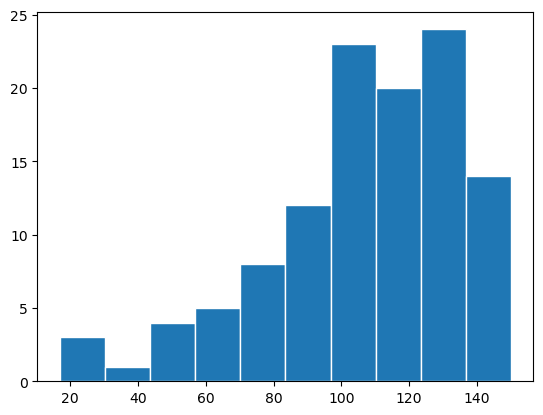

In [404]:
plt.hist(y , edgecolor  = "w");

In [353]:
X_test = norm.rvs(mean , std , n )

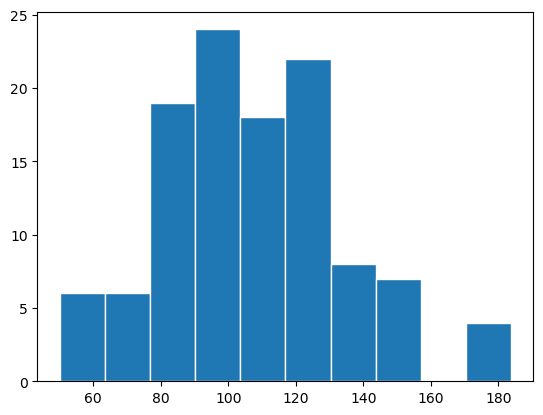

In [403]:
plt.hist(X_test , edgecolor  = "w");

In [384]:
stats.describe(y_return)

DescribeResult(nobs=113, minmax=(array([-1.59393373]), array([1.86726702])), mean=array([-0.01029337]), variance=array([0.24860154]), skewness=array([0.00995687]), kurtosis=array([3.10709869]))

In [385]:
y_return = round(np.log(y).diff()  * 100  , 2)
y_return.dropna(inplace = True)

<Axes: >

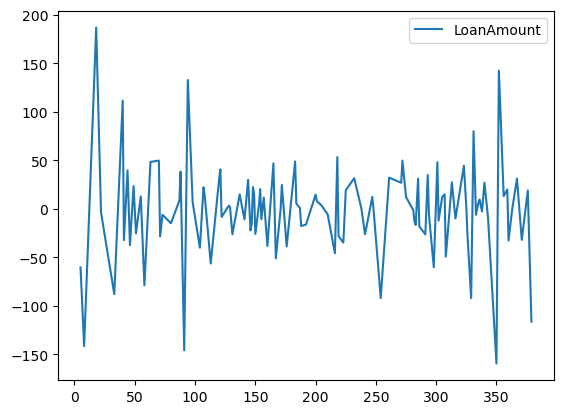

In [387]:
y_return.plot()

In [386]:
y_return.describe()

,LoanAmount
count,113.00000
mean,-1.02885
std,49.86003
min,-159.39000
25%,-25.95000
50%,1.34000
75%,22.31000
max,186.73000


In [381]:
y.describe()

,LoanAmount
count,114.000000
mean,107.280702
std,28.535185
min,17.000000
25%,95.000000
50%,111.000000
75%,128.000000
max,150.000000


In [421]:
n  , minmax , mean , var  , skew , kurt  = stats.describe(y)
mini , maxi  = minmax  
std  = var**.5 

In [422]:
Xtest = stats.kurtosistest(X_test)
Ytest  = stats.kurtosistest(y_return)

print(f'{"         Test statistics":20}{"p-value":>15}')
print(f'{"   " *5 }{"-"*30}')
print(f"X_test:{ Xtest[0]:>17.2f}{Xtest[1]:16.4f}")

#  print(f"New_data:{Ytest[0]:13.2f}{Ytest[1]:16.4f}")

print(Ytest)

         Test statistics        p-value
               ------------------------------
X_test:             0.75          0.4513
KurtosistestResult(statistic=array([3.67037547]), pvalue=array([0.00024219]))


In [423]:
Ytest

KurtosistestResult(statistic=array([3.67037547]), pvalue=array([0.00024219]))

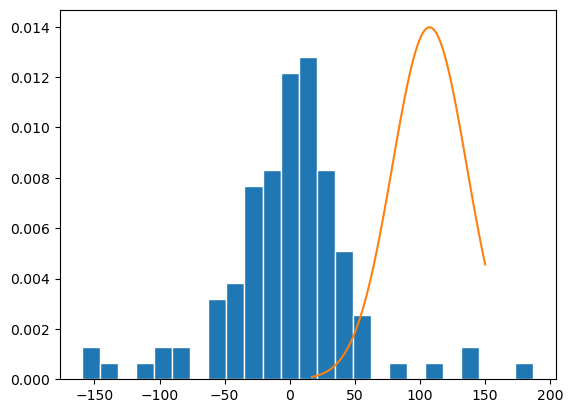

In [424]:
plt.hist(y_return , bins = 25 , edgecolor  = "w" , density = True)
overlay  = np.linspace(mini,maxi , 100)
plt.plot(overlay , norm.pdf(overlay , mean , std));

In [433]:
stats.ttest_1samp(y , 0 , alternative = 'two-sided')  # if the sample is not too large 

TtestResult(statistic=array([40.1414759]), pvalue=array([1.04389958e-68]), df=array([113]))

In [431]:
y_return

,LoanAmount
5,-60.35
8,-141.53
18,186.73
22,-3.70
33,-87.92
...,...
363,-0.93
367,31.08
371,-32.02
376,18.86


In [448]:
c = pd.DataFrame(y , columns = ['LoanAmount'])
c['lag_1']  = c.LoanAmount.shift(1)
c['lag_2']= c.LoanAmount.shift(2)
c.dropna(inplace = True)
c

,LoanAmount,lag_1,lag_2
8,17.0,70.0,128.0
18,110.0,17.0,70.0
22,106.0,110.0,17.0
33,44.0,106.0,110.0
40,134.0,44.0,106.0
...,...,...,...
363,107.0,108.0,150.0
367,146.0,107.0,108.0
371,106.0,146.0,107.0
376,128.0,106.0,146.0


In [483]:
lr = np.linalg.lstsq(c[['lag_1' , 'lag_2']] , c['LoanAmount'] , rcond = None )[0]

In [484]:
c['predict']  = np.dot(c[['lag_1' ,'lag_2']] , lr)
c.head()

,LoanAmount,lag_1,lag_2,predict
8,17.0,70.0,128.0,90.881993
18,110.0,17.0,70.0,37.805725
22,106.0,110.0,17.0,68.359269
33,44.0,106.0,110.0,103.726528
40,134.0,44.0,106.0,67.453680


In [485]:
c

,LoanAmount,lag_1,lag_2,predict
8,17.0,70.0,128.0,90.881993
18,110.0,17.0,70.0,37.805725
22,106.0,110.0,17.0,68.359269
33,44.0,106.0,110.0,103.726528
40,134.0,44.0,106.0,67.453680
...,...,...,...,...
363,107.0,108.0,150.0,121.017824
367,146.0,107.0,108.0,103.476819
371,106.0,146.0,107.0,124.871920
376,128.0,106.0,146.0,118.282567
